In [3]:
# Import libraries at the very top of your notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv("superstore.csv.csv", encoding="latin1")
print(df.shape)
print(df.info()) 
print(df.head())


(9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dt

In [26]:
# Check missing values
print(df.isnull().sum())

# Fill missing postal codes with 0 (or keep NaN if you prefer)
df['Postal_Code'] = df['Postal_Code'].fillna(0).astype('Int64')


Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


In [27]:
# Check duplicates
print(df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)


0


In [28]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)


In [29]:
# Feature engineering
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Quarter'] = df['Order_Date'].dt.quarter

# Shipping duration
df['Processing_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days


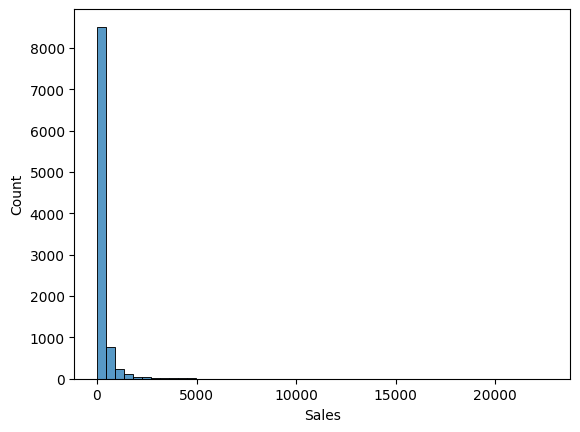

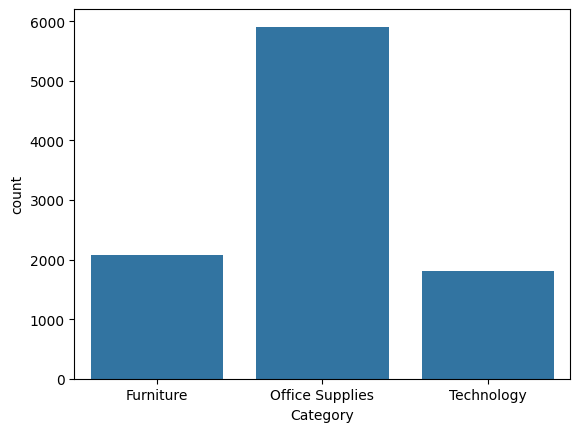

In [30]:
sns.histplot(df['Sales'], bins=50)
plt.show()

sns.countplot(x='Category', data=df)
plt.show()


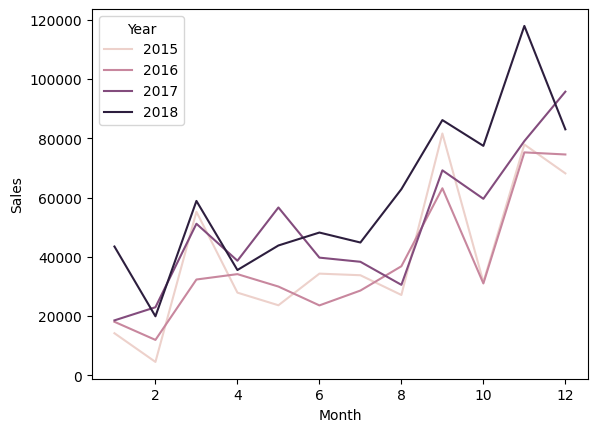

In [31]:
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)
plt.show()


In [32]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


In [33]:
delayed_orders = df[df['Processing_Days'] > df['Processing_Days'].mean()]


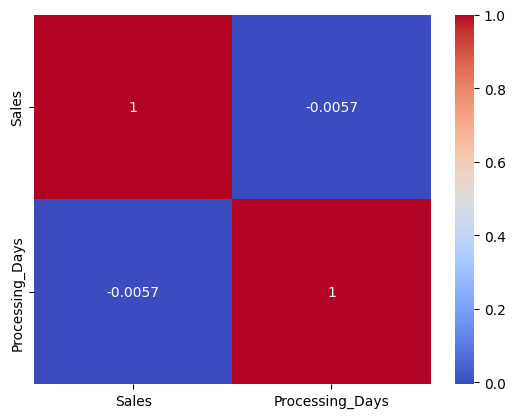

In [34]:
corr = df[['Sales','Processing_Days']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [35]:
total_sales = df['Sales'].sum()
avg_order_value = df['Sales'].mean()
avg_processing_days = df['Processing_Days'].mean()
top_category = category_sales.idxmax()


In [36]:
pivot = pd.pivot_table(df, values='Sales', index='Category', columns='Region', aggfunc='sum')
print(pivot)


Region               Central        East       South         West
Category                                                         
Furniture        160317.4622  206461.388  116531.480  245348.2455
Office Supplies  163590.2430  199940.811  124424.771  217466.5090
Technology       168739.2080  263116.527  148195.208  247404.9300
